## Importing Google Drive Contents

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the CSV file from Google drive, making the labels for the messages for spam or ham, using one tab space as the delimeter

The first five rows of the DataFrame starting from 0, ending at 4:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


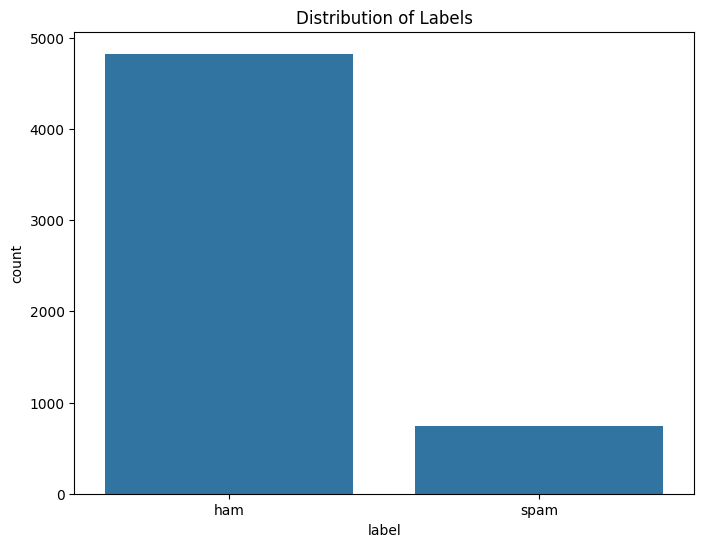

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_path = '/content/drive/MyDrive/CSV/SMSSpamCollection'
df = pd.read_csv(csv_path, on_bad_lines='skip', sep='\t', names=['label', 'message'])

df.head()

print("The first five rows of the DataFrame starting from 0, ending at 4:")
print(df.head())

# Plotting a countplot for visualizing the distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()


## Using "Label Encoding" for turning the data into numeric values

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Now, TF-IDF vectorization for the 'message' column
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])


## Splitting the data, 80% training set, 20% test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

## Data after preprocessing or cleaning

In [5]:
print("DataFrame after cleaning:")
print(df)

DataFrame after cleaning:
     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


## Now applying logistic regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Creating a Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Training the model on the training data
logreg.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# Displaying the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.9641255605381166

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115

